In [1]:
using Plots, DifferentialEquations, StaticArrays, LaTeXStrings, ReferenceFrameRotations

In [2]:
function diffeq_euler(initial_conditions, time_span, params; solver_args...)
    function _differential_system(u, p, t)
        q0, q1, q2, q3, ω1, ω2, ω3 = u
        J1, J2, J3, M1, M2, M3 = p

        return SA[
            -0.5 * (q1*ω1 + q2*ω2 + q3*ω3),
            0.5 * (q0*ω1 + q2*ω3 - q3*ω2),
            0.5 * (q0*ω2 - q1*ω3 + q3*ω1),
            0.5 * (q0*ω3 + q1*ω2 - q2*ω1),
            (M1(u, p, t) + (J2 - J3) * ω2 * ω3) / J1,
            (M2(u, p, t) + (J3 - J1) * ω1 * ω3) / J2,
            (M3(u, p, t) + (J1 - J2) * ω1 * ω2) / J3
        ]
    end

    problem = ODEProblem(_differential_system, initial_conditions, time_span, params)
    solution = solve(problem; solver_args...)

    return solution
end

diffeq_euler (generic function with 1 method)

In [3]:
M0(u, p, t) = 0
M_const(u, p, t) = 0.1

init = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

tspan = (0.0, 5*60.0)

params = [100.0, 100.0, 100.0, M_const, M0, M0]

sol = diffeq_euler(init, tspan, params);

In [4]:
times = LinRange(0, tspan[2], 1000)
sol_interp = sol(times)

quats = Quaternion.(sol_interp[1, 1:end], sol_interp[2, 1:end], sol_interp[3, 1:end], sol_interp[4, 1:end])
euler_angles = quat_to_angle.(quats);

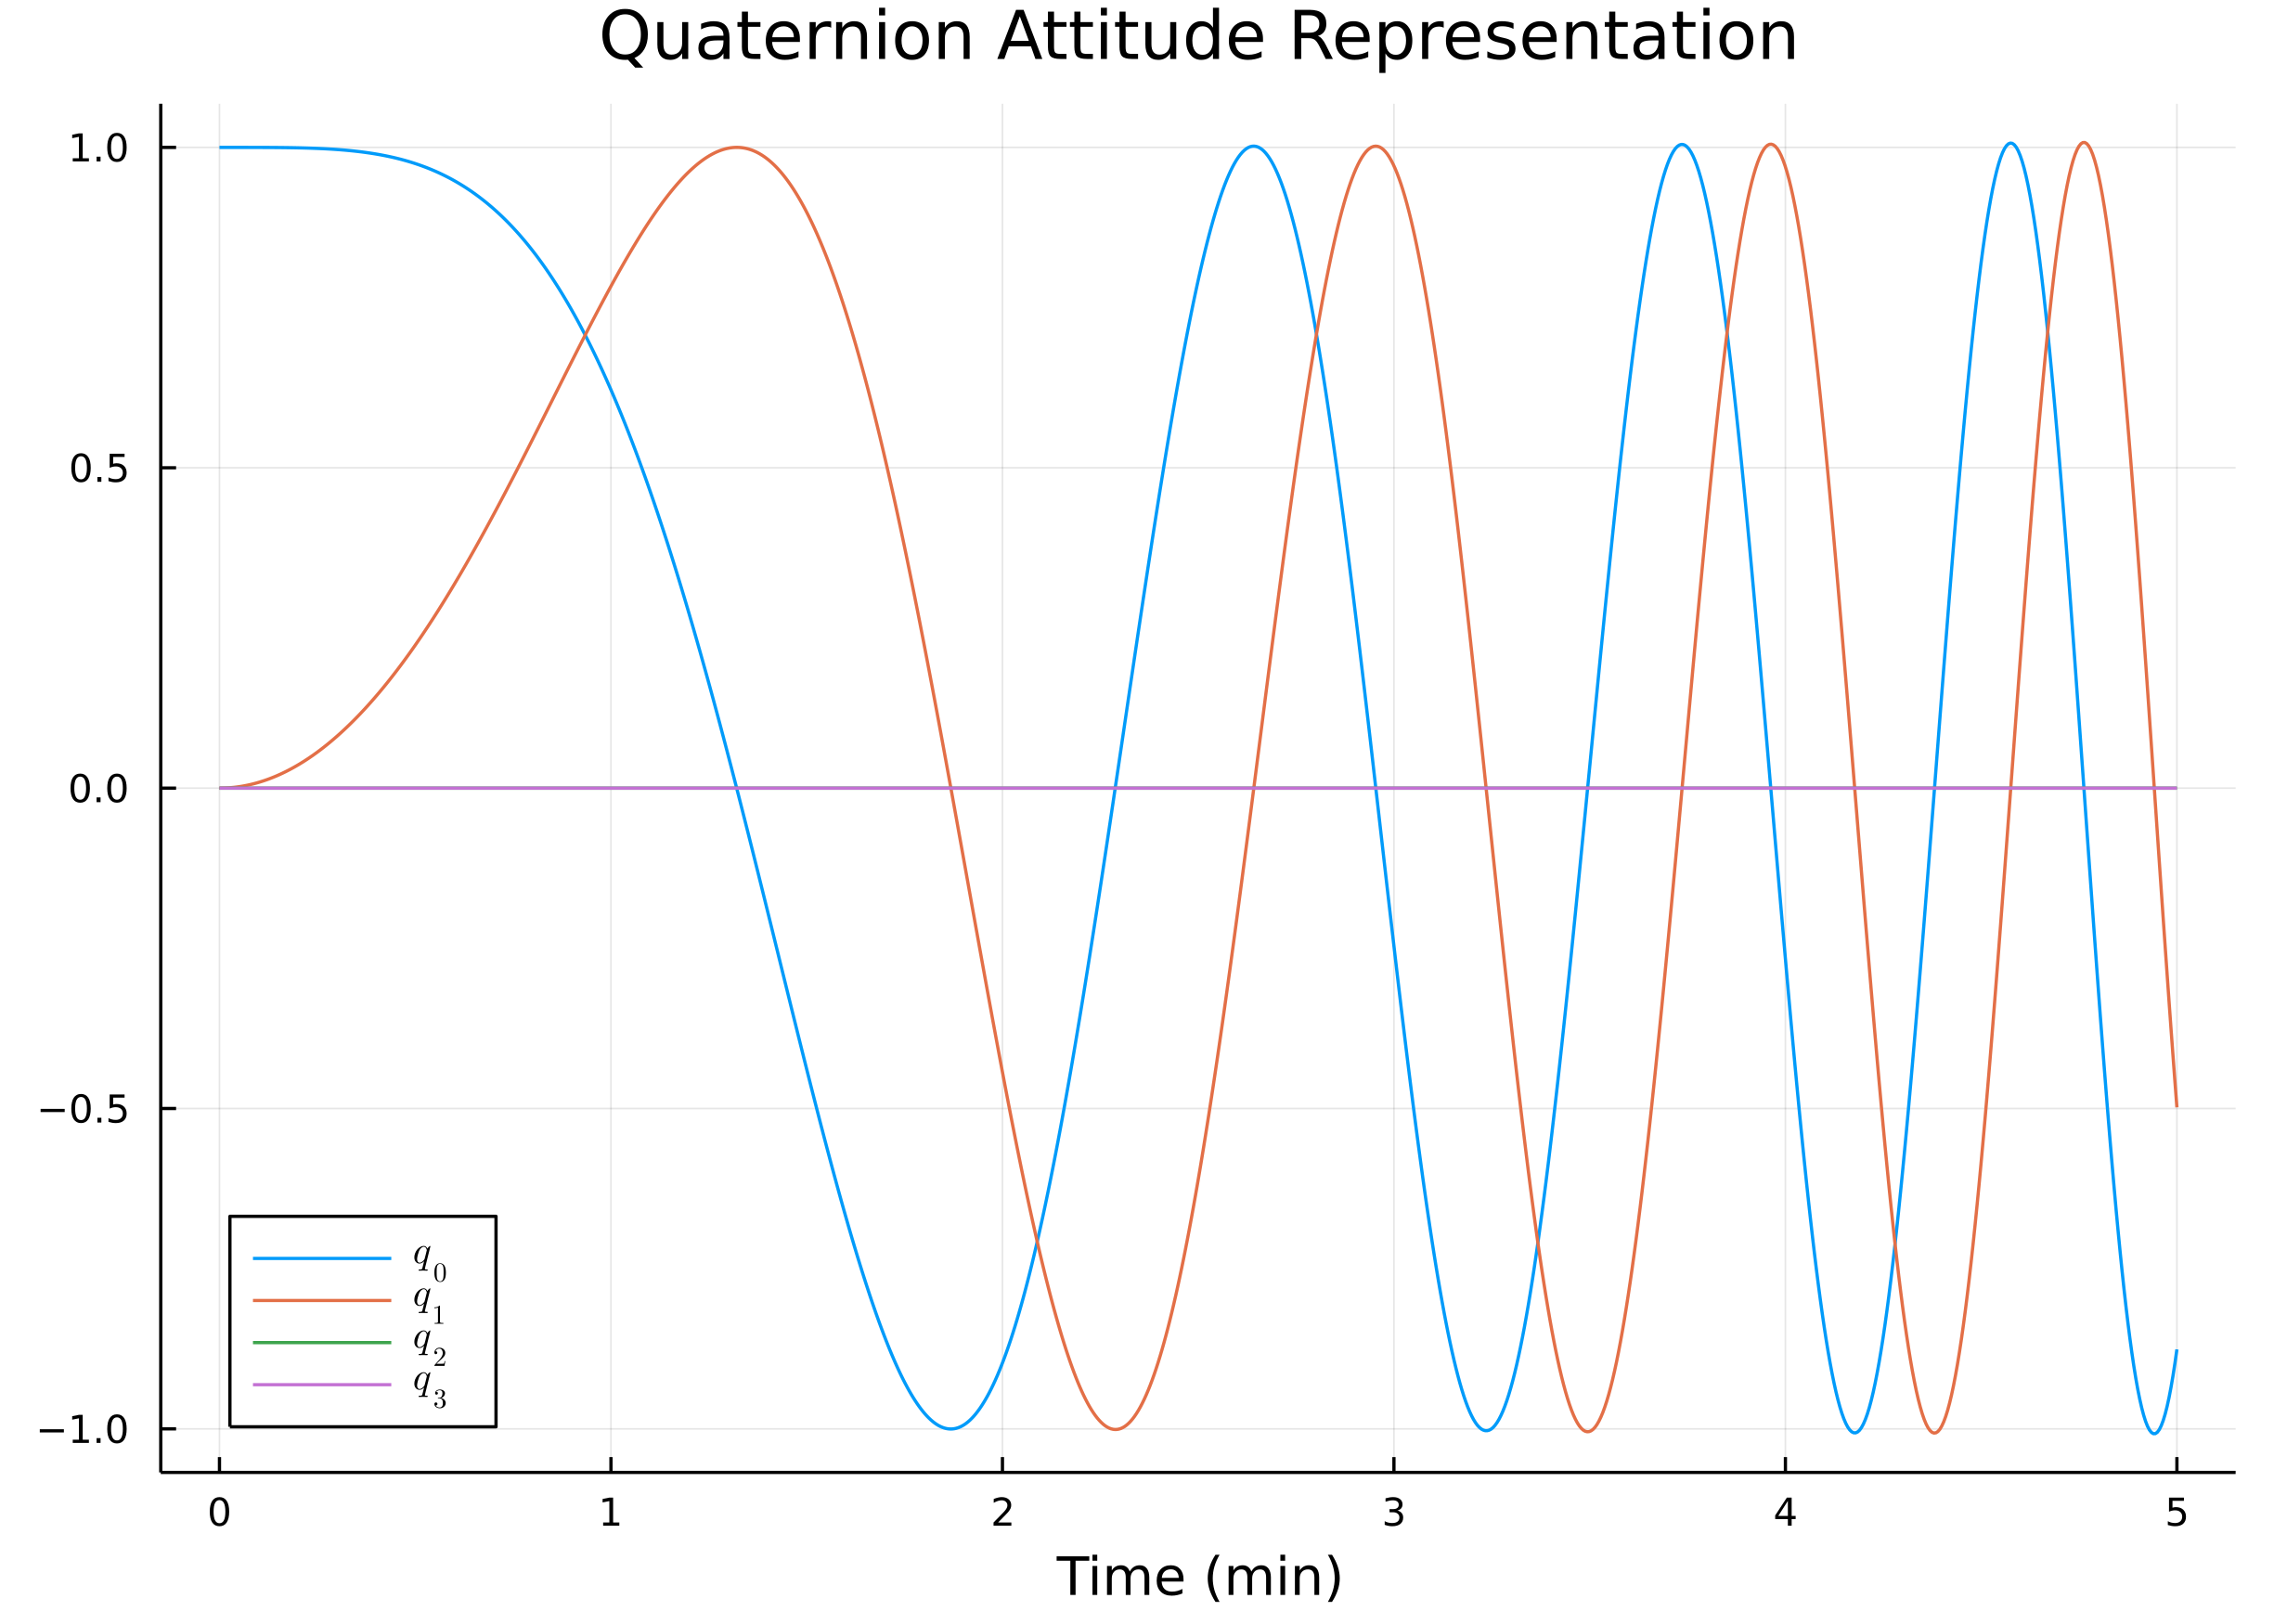

In [5]:
plot(times ./ 60, [quat.q0 for quat in quats], label=L"q_0", dpi=350, legend=:bottomleft, size=(700,500), fmt=:png)
plot!(times ./ 60, [quat.q1 for quat in quats], label=L"q_1")
plot!(times ./ 60, [quat.q2 for quat in quats], label=L"q_2")
plot!(times ./ 60, [quat.q3 for quat in quats], label=L"q_3")

xlabel!("Time (min)")
title!("Quaternion Attitude Representation")

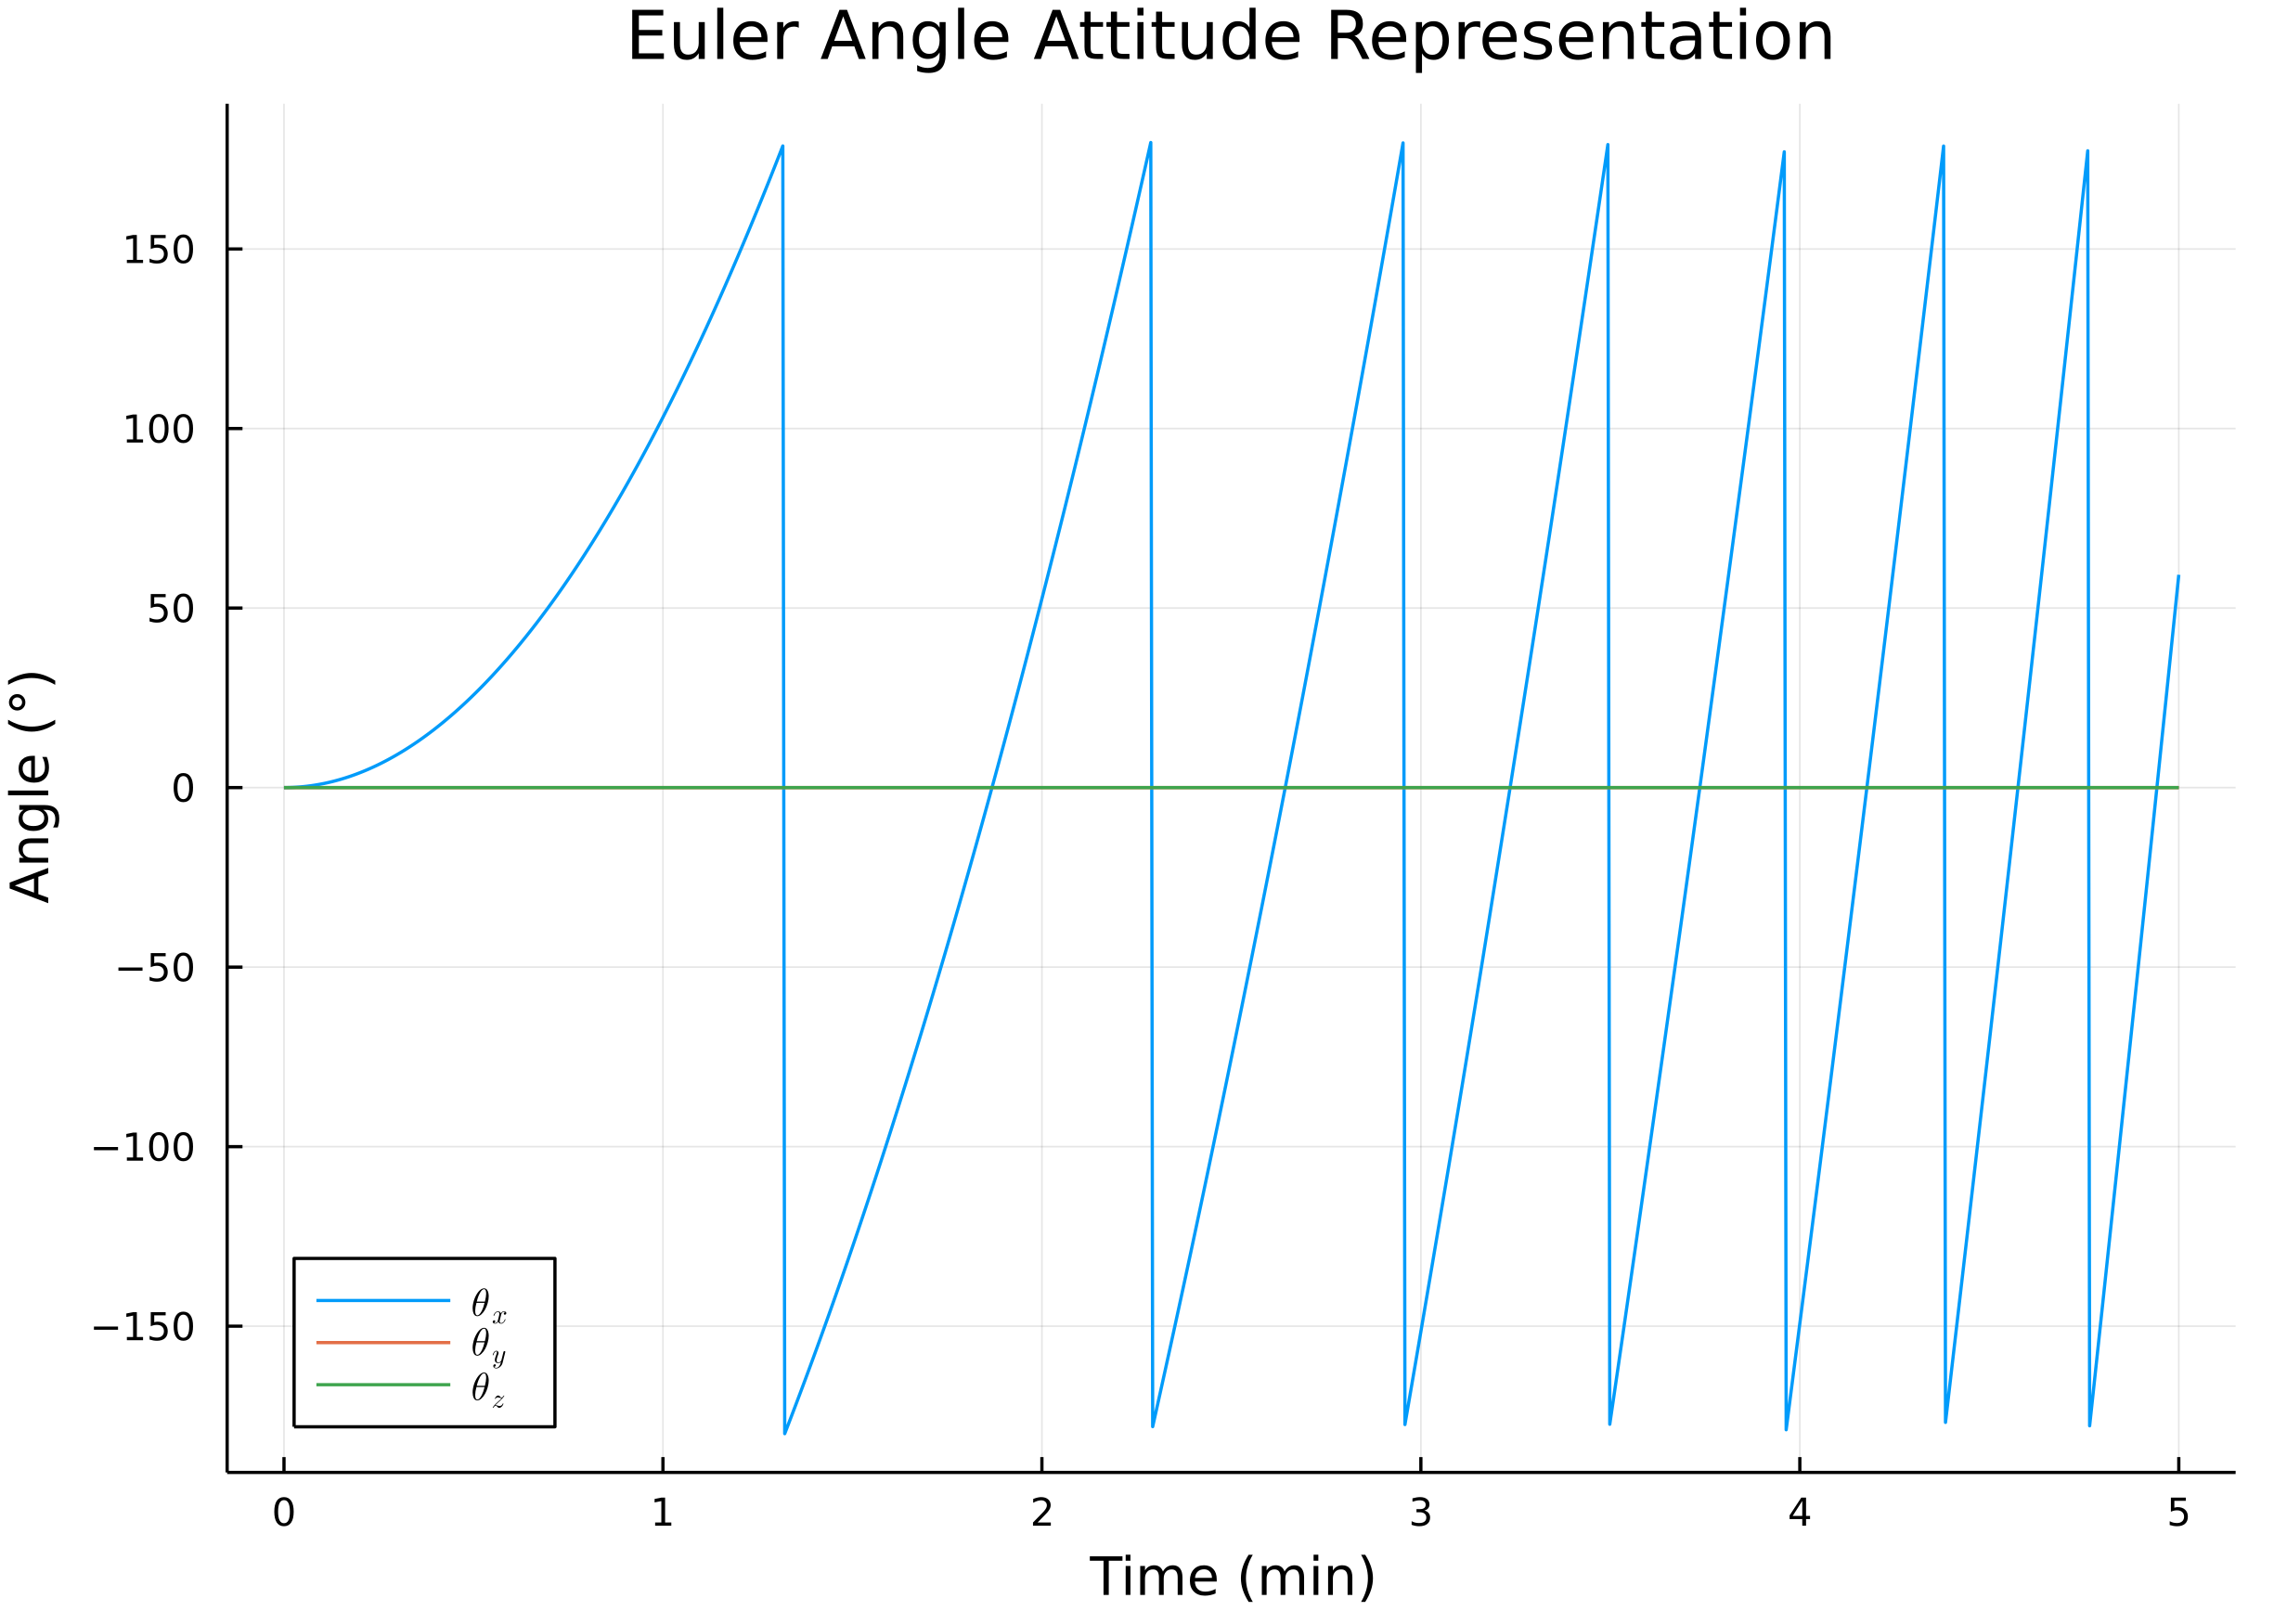

In [6]:
plot(times ./ 60, [rad2deg(angle.a3) for angle in euler_angles], label=L"\theta_x", dpi=350, size=(700,500), legend=:bottomleft, fmt=:png)
plot!(times ./ 60, [rad2deg(angle.a2) for angle in euler_angles], label=L"\theta_y")
plot!(times ./ 60, [rad2deg(angle.a1) for angle in euler_angles], label=L"\theta_z")

xlabel!("Time (min)")
ylabel!("Angle (°)")
title!("Euler Angle Attitude Representation")